# CISC 867 - Assignment 1
## Question 1

The partial derivative for a hidden weight $ w_{i,j}$ between the input $ x_{i}$ and the hidden unit $ h_{j}^{(1)}$.

Start by writing the general form for $ f(\textbf{x})$ : <br />
> $ f = \sigma( \textbf{h}^{(2)}( \textbf{h}^{(1)})) $

The values for $ \textbf{h}^{(1)}$, $ \textbf{h}^{(2)}$ and $ J$ (error term) are given by:
>$ \textbf{h}^{(1)} = \sigma( \textbf{W}^{(1)} \textbf{x} + \textbf{b}^{(1)})$ <br />
$ \textbf{h}^{(2)} = \sigma( \textbf{W}^{(2)} \textbf{h}^{(1)} + \textbf{b}^{(2})$ <br />
$ J = (f-y)^{2}$

Further expanding $f$: <br />
> $ f = \sigma( \textbf{W}^{(3)} \textbf{h}^{(1)} + \textbf{b}^{(2)}) $ <br />

Finding the partial derivative of $ J $ with respect to $\textbf{W}^{(1)}$:
> $ \frac{\partial J}{\partial \textbf{W}^{(1)}} = \frac{\partial(f-y)^{2}}{\partial \textbf{W}^{(1)}} =2(f-y) \frac{\partial f}{\partial \textbf{W}^{(1)}}$ <br />

Use the chain rule to find $ \frac{\partial f}{\partial \textbf{W}^{(1)}}$. We know that $ \sigma ' = \sigma (1-\sigma)$. Therefore:
> $ = 2(f-y)f(1-f) \frac{\partial \sum_{l=1}^{L} w_{l}^{(3)}h_{l}^{(2)}+b^{(3)}}{\partial \textbf{W}^{(1)}}$ <br />

The derivative of the summation term (above) with respect to $\textbf{W}^{(1)}$ is $\textbf{W}^{(3)}$. Therefore: <br />
>$ = 2(f-y)f(1-f) \textbf{W}^{(3)} \frac{\partial \textbf{h}^{(2)}}{\partial \textbf{W}^{(1)}}$

Repeat to find the partial derivative of $ \textbf{h}^{(2)}$:
>$ = 2(f-y)f(1-f) \textbf{W}^{(3)} \textbf{h}^{(2)}(1-\textbf{h}^{(2)}) \frac{\partial \sum_{l=1}^{L} w_{l}^{(2)}h_{l}^{(1)}+b^{(2)}}{\partial \textbf{W}^{(1)}}$

Again, the partial derivative of the summation (above) is $ \textbf{W}^{(2)}$. Therefore:
>$ = 2(f-y)f(1-f) \textbf{W}^{(3)} \textbf{h}^{(2)}(1-\textbf{h}^{(2)})\textbf{W}^{(2)} \frac{\partial \textbf{h}^{(1)}}{\partial \textbf{W}^{(1)}}$

The partial derivative of $ \textbf{h}^{(1)}$:
>$ = 2(f-y)f(1-f) \textbf{W}^{(3)} \textbf{h}^{(2)}(1-\textbf{h}^{(2)})\textbf{W}^{(2)} \textbf{h}^{(1)}(1-\textbf{h}^{(1)}) \frac{\partial \sum_{n=1}^{N} w_{n,j}^{(2)}x_{n}^{(1)}+b_{j}}{\partial \textbf{W}^{(1)}}$

The partial derivative of the sum (above) is simply $\textbf{X}$:
>$ = 2(f-y)f(1-f) \textbf{W}^{(3)} \textbf{h}^{(2)}(1-\textbf{h}^{(2)})\textbf{W}^{(2)} \textbf{h}^{(1)}(1-\textbf{h}^{(1)}) \textbf{x}$

Putting the above in the index notation yields:
>$\frac{\partial J(\textbf{x},y)}{\partial w_{i,j}^{1}} = 2(f(\textbf{x})-y)f(\textbf{x})(1-f(\textbf{x})) w_{j}^{3} h^{(2)}_{j}(1-h^{(2)}_{j})w_{j}^{2} h^{(1)}_{j}(1-h^{(1)}_{j}) x_{i}$

## Question 2

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class Network:
    "Creates the architecture for a simple neural network with one hidden layer"

    def __init__(self, h_neurons=3, input_size=2, output_size=1, weight_size=None):
        """        
        Parameters
        ===========
        h_neurons : integer
            The number of neurons in the hidden layer. Defaults to 3
        input_size : integer
            The number of neurons in the input layer. Defaults to 2
        output_size : integer
            The number of neurons in the output layer. Defaults to 1
        weight_size : float
            If weight_size is specified, it initializes the weights and biases
            to have a mean about the weight_size. Sigma = 1
        """
        self.input_size = input_size
        self.hidden_size = h_neurons
        self.output_size = output_size
        self.weight_size = weight_size

        # Set weights and biases
        # From numpy documentation: sigma * np.random.randn(...) + mu
        if self.weight_size is None:

            # Weights and biases set with sigma=1, mu=0
            self.w1 = np.random.randn(self.hidden_size, self.input_size)
            self.w2 = np.random.randn(self.hidden_size, self.output_size)
            self.b1 = np.random.randn(self.hidden_size, 1)
            self.b2 = np.random.randn(self.output_size, 1)

        else:
            self.w1 = (
                np.random.randn(self.hidden_size, self.input_size) + self.weight_size
            )
            self.w2 = (
                np.random.randn(self.hidden_size, self.output_size) + self.weight_size
            )
            self.b1 = np.random.randn(self.hidden_size, 1) + self.weight_size
            self.b2 = np.random.randn(self.output_size, 1) + self.weight_size

    # Sigmoid function
    def sigmoid(self, z):
        return 1.0 / (1.0 + np.exp(-z))

    # Derivative of sigmoid function
    def sigmoid_prime(self, z):
        return self.sigmoid(z) * (1 - self.sigmoid(z))

    # Forward propagation function
    def forward(self, X):
        # hidden layer
        a1 = np.dot(self.w1, X) + self.b1
        h1 = self.sigmoid(a1)

        # output layer
        a2 = np.dot(self.w2.T, h1) + self.b2
        y_hat = self.sigmoid(a2)
        return a1, h1, a2, y_hat

    def train(self, X, y, learn_rate=0.5, epochs=10000):
        """Trains the neural network.
        
        Parameters
        ===========
        X : ndarray
            The training data. For XOR, it should be in format:
            X = np.array([[[1],[1]], [[0],[1]], [[1],[0]], [[0],[0]]])
        y : ndarray
            The testing data. For XOR, it should be in format:
            y = np.array([0, 1, 1, 0])
        learn_rate : float
            The learning rate for the neural network. Defaults to 0.5
        epochs : integer
            The number of epochs to do training over. Defaults to 10000
        """
        # Initialize the parameters
        self.learn_rate = learn_rate
        self.epochs = epochs

        batch_size = len(y)  # determine size of each batch

        # Initialize a bunch of lists so we can track some costs (error),
        # activations, weights, and unit outputs
        self.costs = []  # store the costs so they can be plotted
        self.avg_w1 = []  # store average weights so they can be plotted
        self.avg_dw1 = []  # store average gradients of weights
        self.avg_db1 = []  # store average gradients of biases
        self.a1s = []  # store average activations
        self.a2s = []  # store average activations
        self.h1s = []  # store output from hidden layer neurons

        # Run through each of the epochs
        for epoch in range(self.epochs):

            # Set gradient matrices to "zeros" for each epoch
            dw1 = np.zeros((self.hidden_size, self.input_size))
            dw2 = np.zeros((self.hidden_size, self.output_size))
            db1 = np.zeros((self.hidden_size, 1))
            db2 = np.zeros((self.output_size, 1))

            # record the average error (cost) across each sample in the epoch
            self.epoch_error = np.empty([1, 1])

            # lists to store things we want to plot later
            a1_temp_list = []
            a2_temp_list = []
            h1_temp_list = []

            # Iterate through each sample for the epoch
            for s in range(batch_size):

                # Forward propagation
                a1, h1, a2, y_hat = self.forward(X[s])

                # Append results from forward prop to temp lists
                a1_temp_list.append(a1)
                a2_temp_list.append(a2)
                h1_temp_list.append(h1)

                # Find the cost (squared error)
                J = 0.5 * (y_hat - y[s]) ** 2
                
                # append to error array
                self.epoch_error = np.append(
                    self.epoch_error, J
                )  

                # Use backprop from output layer to hidden layer
                g2 = y_hat - y[s]
                dw2 += -g2 * h1
                db2 += -g2

                # Use backprop from hidden layer to input layer
                g1 = -g2 * self.sigmoid_prime(h1) * self.w2
                dw1 += np.dot(g1, X[s].T)
                db1 += g1

            # Append the values we want to plot from each epoch onto its corresponding list
            self.avg_dw1.append(abs(np.mean(dw1)))
            self.avg_w1.append(self.w1[0][0])
            self.a1s.append(np.mean(a1_temp_list))
            self.a2s.append(np.mean(a2_temp_list))
            self.h1s.append(np.mean(h1_temp_list))
            self.costs.append(np.mean(np.delete(self.epoch_error, 0)))

            # Update the weights
            self.w1 += dw1 * self.learn_rate / batch_size
            self.w2 += dw2 * self.learn_rate / batch_size
            self.b1 += db1 * self.learn_rate / batch_size
            self.b2 += db2 * self.learn_rate / batch_size

    def predict(self, X, y):
        """Function to predict the results after network has been trained"""

        r = []  # row labels
        pred = []  # store predictions
        true_val = []  # store true values
        abs_error = []  # store absolute error terms

        # for each sample test the results
        for s in range(len(X)):
            a1, h1, a2, y_hat = self.forward(X[s])
            pred.append(y_hat[0][0])
            true_val.append(y[s])
            abs_error.append(abs(y[s] - y_hat[0][0]))
            r.append(f"({int(X[s][0])} {int(X[s][1])})")

        # Create a pandas data-frame to nicely visualize results
        df = pd.DataFrame(
            [true_val, pred, abs_error],
            columns=r,
            index=["True Value", "Prediction", "Absolute Error"],
        ).T
        return df

    def error_chart(self):
        """Plot the errors over each epoch"""
        fig, ax = plt.subplots()
        ax.plot(self.costs)
        ax.set(
            xlabel="Epochs", ylabel="Squared Error", title="Error vs. Number of Epochs"
        )

        return plt

    def activation_chart(self):
        """Plot the activations (net-inputs)"""
        fig, ax = plt.subplots()
        ax.plot(self.a2s, label="Activation to output layer, a2")
        ax.plot(self.a1s, label="Activation to hidden neurons, a1")

        ax.set(
            xlabel="Epochs",
            ylabel="Average Value of Activations",
            title="Average Values for Activations (Net Inputs) vs. Number of Epochs",
        )
        ax.legend()

        return plt

Test the neural network on the XOR problem. We'll create a network with 5 hidden neurons. The learning rate will be set to 0.5 and we'll train our network over 10,000 epochs. Weights and biases will be randomly generated. <br />

A plot of the squared error versus the number of epochs will be shown to see if the neural network learned.

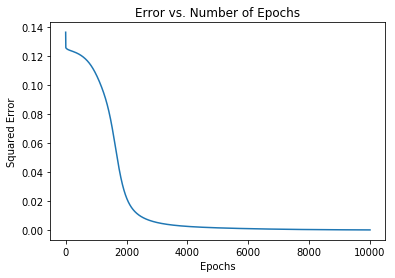

In [3]:
# Set seed so that results can be replicated
np.random.seed(seed=4)

# Train data
X_train = np.array([[[1],[1]], [[0],[1]], [[1],[0]], [[0],[0]]], dtype=float)
y_train = np.array([0, 1, 1, 0], dtype=float)

# Initialize network
nn1 = Network(h_neurons=5)

# Train the network
nn1.train(X_train, y_train, learn_rate=0.5, epochs=10000)

# Print the error vs. number of epoch chart
nn1.error_chart().show()

It appears that the network has learned! <br />

Now let's print out some predictions.

In [4]:
# Test data
X_test = np.array([[[0],[1]], [[1],[1]], [[0],[0]], [[1],[0]]], dtype=float)
y_test = np.array([1, 0, 0, 1], dtype=float)

# See if our predictions or good. Print out the prediction table.
p = nn1.predict(X_test,y_test)
p

,True Value,Prediction,Absolute Error
(0 1),1.0,0.978185,0.021815
(1 1),0.0,0.024083,0.024083
(0 0),0.0,0.019522,0.019522
(1 0),1.0,0.978271,0.021729


Looks like our network has trained well! The error for each training example is low.

## Question 3

Now we want to play with weights and see what happens when we make them to be very large. We'll initialize the weights and biases to be around 20. 

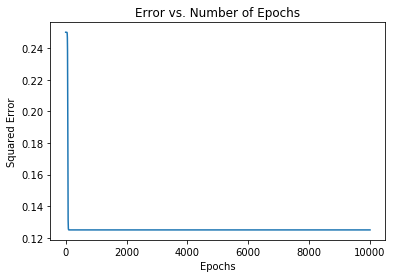

,True Value,Prediction,Absolute Error
(1 1),0.0,0.5,0.5
(0 1),1.0,0.5,0.5
(1 0),1.0,0.5,0.5
(0 0),0.0,0.5,0.5


In [5]:
# Set seed so that results can be replicated
np.random.seed(seed=1)

# Train data
X_train = np.array([[[1],[1]], [[0],[1]], [[1],[0]], [[0],[0]]], dtype=float)
y_train = np.array([0, 1, 1, 0], dtype=float)

# Initialize network. The size of the weights will be around 20
nn2 = Network(h_neurons=5, weight_size=20)

# Train the network
nn2.train(X_train, y_train, learn_rate=0.5, epochs=10000)

# Print the error vs. number of epoch chart and show the predictions
nn2.error_chart().show()
p = nn2.predict(X_train,y_train)
p

Yikes - terrible predictions! Looks like the neural network did not learn. <br />

Let's see what some of the inputs and outputs to the neurons are like.

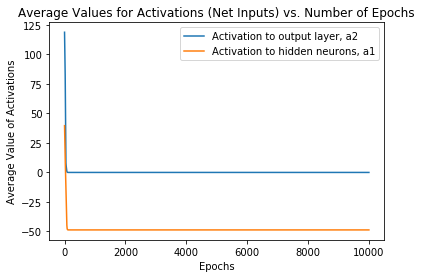

In [6]:
# Print the net inputs and outputs vs epochs chart, and the error chart
nn2.activation_chart().show()

Clearly, after around 100 epochs, the activation values to the hidden neurons get very large. The activation to the output layer -- to $f(\textbf{x})$ -- gets very small (about zero). <br />

To confirm that the activation to the output layer is around zero, let's take a mean over the last 8000 epochs for each:

In [7]:
print("Mean for the activation to output layer for last 8000 epochs:", np.mean(nn2.a2s[2000:]))

Mean for the activation to output layer for last 8000 epochs: -5.614739737354599e-17


The value is very small. Let's run the same initialization, but stop the training after 100 epochs so we can get a better view of the activations.

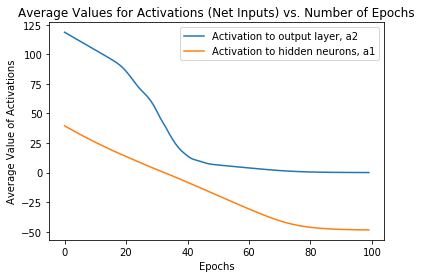

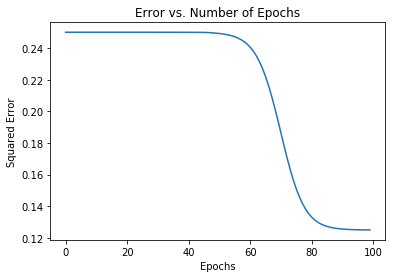

In [8]:
# Set seed so that results can be replicated
np.random.seed(seed=1)
nn2 = Network(h_neurons=5, weight_size=20)
nn2.train(X_train, y_train, learn_rate=0.5, epochs=100)

# Print the net inputs and outputs vs epochs chart, and the error chart
nn2.activation_chart().show()
nn2.error_chart().show()

What is happening here, and why the neural network is not training, is that activations going into the sigmoid "squashing" function (and its derivative) are very large (in absolute terms) at all points in time. Either the activation going to the hidden neurons is large or the activation going to the output layer is large. <br />

At large values, the sigmoid and sigmoid prime functions are very flat. If we give these function large values (due to large weights) then there is no-to-little gradient -- the functions are said to be "saturated". Without a sufficient gradient our neural network cannot learn through back propogation.